In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

plt.rc('font', family='Times New Roman', size=7.5, weight='bold')
font = {'family': 'Times New Roman', 'weight': 'bold', 'size': 7.5}

In [2]:
atom_mass = {'Ni': 58.69, 'Al': 26.98, 'Co': 58.93, 'Cr': 52, 'Mo': 95.95, 'Re': 186.2, 'Ru': 101.07,
             'Ti': 47.87, 'Ta': 180.94, 'W':  183.84, 'Hf': 178.49, 'Nb': 92.90, 'Si': 28.085, 'C': 12,
             'Y': 88.90, 'Ce': 140.12, 'B': 10.81}

CE = {'Ni':4.435, 'Al':3.389, 'Co':4.394, 'Cr':4.094, 'Mo':6.819, 'Re':8.03, 'Ru':6.74, 'Ti':4.85, 'Ta':8.105, 
      'W':8.903, 'Hf':6.436, 'Nb':7.566, 'Si':4.63, 'C':7.37, 'Y':4.37, 'Ce':4.32, 'B':5.77}

PE = {'Ni':1.91, 'Al':1.61, 'Co':1.88, 'Cr':1.66, 'Mo':2.16, 'Re':1.9, 'Ru':2.2, 'Ti':1.54, 'Ta':1.5, 
      'W':2.36, 'Hf':1.3, 'Nb':1.6, 'Si':1.9, 'C':2.55, 'Y':1.22, 'Ce':1.12, 'B':2.04}

IE = {'Ni':737.1, 'Al':577.5, 'Co':760.4, 'Cr':652.9, 'Mo':684.3, 'Re':760, 'Ru':710.2, 'Ti':658.8, 'Ta':761, 
      'W':770, 'Hf':658.5, 'Nb':652.1, 'Si':786.5, 'C':1086.5, 'Y':600, 'Ce':534.4, 'B':800.6}

VE = {'Ni':1.41, 'Al':0.76, 'Co':1.25, 'Cr':1.8, 'Mo':2.67, 'Re':2.37, 'Ru':1.91, 'Ti':1.56, 'Ta':2.88, 
      'W':3.22, 'Hf':1.87, 'Nb':2.4, 'Si':0, 'C':0, 'Y':1.19, 'Ce':1.27, 'B':0}

atom_radius = {'Ni': 0.149, 'Al': 0.118, 'Co': 0.152, 'Cr': 0.166, 'Mo': 0.19, 'Re': 0.188, 'Ru': 0.178, 'Ti': 0.176,
               'Ta': 0.2, 'W': 0.193, 'Hf': 0.208, 'Nb': 0.198,
               'Si': 0.111, 'C': 0.067, 'Y': 0.212, 'Ce': 0.185, 'B': 0.087}

ion_radius = {'Ni': 72, 'Al': 50, 'Co': 74, 'Cr': 69, 'Mo': 62, 'Re': 63, 'Ru': 81, 'Ti': 68,
              'Ta': 69, 'W': 62, 'Hf': 79, 'Nb': 70, 'Si': 42, 'C': 16, 'Y': 90, 'Ce': 92, 'B': 20}

ion_valence = {'Ni': 2, 'Al': 3, 'Co': 3, 'Cr': 3, 'Mo': 6, 'Re': 5, 'Ru': 4, 'Ti': 4, 'Ta': 5, 'W': 6, 
               'Hf':4, 'Nb':5, 'Si':4, 'C':4, 'Y':3, 'Ce':4, 'B':3}

e_a_con = {'Ni': 1.16, 'Al': 3.01, 'Co': 1.03, 'Cr': 0.92, 'Mo': 1.39, 'Re': 1.4, 'Ru': 1.04, 'Ti': 1.14,
           'Ta': 1.57, 'W': 1.43, 'Hf':1.76, 'Nb':1.32, 'Si':4, 'C':3.92, 'Y':3.15, 'B':2.98}

D0_Ni = {'Ni':1.9e-4, 'Al': 1.85e-4, 'Co':7.5e-5, 'Cr':3e-6, 'Mo':1.15e-4, 'Re':8.2e-7, 
         'Ru':2.48e-4, 'Ti':4.1e-4, 'Ta':0.031e-4, 'W':8e-6, 'Nb': 0.595e-4}

q_Ni = {'Ni': -287, 'Al': -284, 'Co': -284.169, 'Cr': -287, 'Mo': -267.585, 'Re': -278.817,
        'Ru': -304.489, 'Ti': -256.9, 'Ta': -267.729, 'W': -282.13, 'Hf': -251.956, 'Nb': -230}

D0_Ni3Al = {'Ni':1e-4, 'Al': 6.6e-8, 'Co':4.2e-3, 'Cr':1.1e-1, 'Mo':2.3e2, 'Re':1.5, 
            'Ru':1.3e-3, 'Ti':56, 'Ta':7.16, 'Nb': 26}

q_Ni3Al = {'Ni': -303, 'Al': -258, 'Co': -325, 'Cr': -366, 'Mo': -493,
           'Re': -467.5, 'Ru': -318.7, 'Ti': -468, 'Ta': -425, 'Nb': -475.6}

In [3]:
path = '.../Al2O3_tc_data.csv'

In [4]:
# composition
composition_features = ['Ni', 'Al', 'Co', 'Cr', 'Mo', 'Re', 'Ru', 'Ti', 'Ta', 'W',
                        'Hf', 'Nb', 'Si', 'C', 'Y', 'Ce', 'B']
# activity
a_features = ['Ni_a', 'Al_a', 'Cr_a']
# elemental properties
properties_dict = {'CE': CE, 'PE': PE, 'IE': IE, 'VE': VE, 'a_r': atom_radius, 'i_r': ion_radius,
                   'ion_v': ion_valence, 'e_a_con': e_a_con}

In [5]:
param_dict = {'RF': {'n_estimators': 492, 'max_features': 1,
                               'max_depth': 9, 'random_state': 2022}}

In [6]:
class FeatureEngineer:
    def __init__(self, properties_dict, data):
        self.properties_dict = properties_dict
        self.data = data

    def mean_calc(self, p_dict):
        calc_num = np.zeros(len(self.data))
        for atom in p_dict.keys():
            calc_num += self.data.loc[:, atom].values * p_dict[atom]
        return calc_num

    def diff_calc(self, p_dict):
        calc_num = np.zeros(len(self.data))
        for atom in p_dict.keys():
            calc_num += self.data[atom].values * (p_dict['Ni'] - p_dict[atom]) ** 2
        return np.sqrt(calc_num)

    def get_feature(self):
        feature_df = pd.DataFrame()
        for p_name, p_dict in self.properties_dict.items():
            feature_df[p_name + '_avg'] = self.mean_calc(p_dict)
            feature_df[p_name + '_var'] = self.diff_calc(p_dict)
        return feature_df

In [7]:
def wt_to_at(data, atom_features):
    wt_value = data[atom_features].values
    at_value = wt_value / np.array([atom_mass[j] for j in atom_features])
    sum_num = np.sum(at_value, axis=1).reshape(-1, 1)
    at_value = at_value / sum_num
    for index, i in enumerate(atom_features):
        data.loc[:, i] = at_value[:, index]
    return data

def G_al2o3(T, al_a):
    G0 = 0.2193*(T + 273.15) - 1127.3137
    R = 8.314
    p = 0.2
    return G0 + (R*(T + 273.15)*np.log(1 / al_a**(4/3) / p)) / 1000

def Val_eff(data, c=False):
    val_eff_num = 0
    for i in ion_valence.keys():
        if not c:
            val_eff_num += (ion_valence[i] - 3)*data[i]
        elif c == 'A1':
            if i in ['Ni', 'Al', 'Co', 'Cr', 'Mo', 'Re', 'Ru', 'Ti', 'Ta', 'W', 'Hf']: 
                val_eff_num += (ion_valence[i] - 3)*data[i + '_A1']
        elif c == 'L12':
            if i in ['Ni', 'Al', 'Co', 'Cr', 'Mo', 'Re', 'Ru', 'Ti', 'Ta', 'W', 'Hf']: 
                val_eff_num += (ion_valence[i] - 3)*data[i + '_L12']
    return val_eff_num

def Ni_diffusion(data):
    D0_eff = 0
    elem = ['Ni', 'Al', 'Co', 'Cr', 'Mo', 'Re', 'Ru', 'Ti', 'Ta', 'W']
    for atom in elem:
        D0_eff += D0_Ni[atom] * data[atom + '_A1']
    Q_eff = q_Ni['Ni']
    for atom in elem[1: ]:
        Q_eff += q_Ni[atom] * data[atom + '_A1']
    D_eff = D0_eff*np.exp(Q_eff*1000 / 8.314 / (data['Temperature'] + 273.15))
    return D_eff

def Ni3Al_diffusion(data):
    D0_eff = 0
    elem = ['Ni', 'Al', 'Co', 'Cr', 'Mo', 'Re', 'Ru', 'Ti', 'Ta']
    for atom in elem:
        D0_eff += D0_Ni3Al[atom] * data[atom + '_L12']
    Q_eff = 0
    for atom in elem:
        Q_eff += q_Ni3Al[atom] * data[atom + '_L12']
    D_eff = D0_eff*np.exp(Q_eff*1000 / 8.314 / (data['Temperature'] + 273.15))
    return D_eff

In [8]:
def computeCorrelation(X, Y):
    xBar = np.mean(X)
    yBar = np.mean(Y)
    SSR = 0
    varX = 0
    varY = 0
    for i in range(0 , len(X)):
        diffXXBar = X[i] - xBar
        diffYYBar = Y[i] - yBar
        SSR += (diffXXBar * diffYYBar)
        varX +=  diffXXBar**2
        varY += diffYYBar**2
    
    SST = np.sqrt(varX * varY)
    return SSR / SST

In [9]:
data = pd.read_csv(path, encoding='gb2312')            
data['index'] = range(len(data))
data['group'] = data.groupby(composition_features)['index'].transform('max')
groups = data['group']
data.drop(['index', 'group'], axis=1, inplace=True)

In [10]:
features = ['Temperature'] + a_features
a_data = data[features]
composition_num = len(set(groups))
kp_label = np.log(data['k(g2/m4/h)'])
gkf = GroupKFold(n_splits=composition_num)

In [11]:
# transfer wt. to at.
data = wt_to_at(data, composition_features)
# cbcv features
FE = FeatureEngineer(properties_dict, data)
cbfv_features = FE.get_feature()
for i in cbfv_features.columns:
    a_data[i] = cbfv_features[i]

In [12]:
# domain features
a_data['Val_eff_c'] = Val_eff(data)
a_data['Val_eff_γ'] = Val_eff(data, c='A1')
a_data["Val_eff_γ'"] = Val_eff(data, c='L12')
a_data['D_Ni'] = Ni_diffusion(data)
a_data['D_Ni3Al'] = Ni3Al_diffusion(data)

## baseline model
### features: Temperature and the activity of Ni, Al, Cr
### model: RF CB-CV 

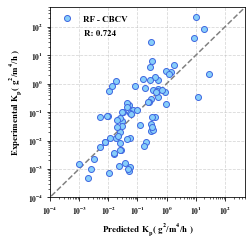

In [13]:
f = ['Temperature'] + ['Ni_a', 'Al_a', 'Cr_a']
a_data_f = a_data[f]
test_list = []
pre_list = []
feature_importance = np.zeros((len(a_data_f.columns), composition_num))
for fold, (train_id, test_id) in enumerate(gkf.split(a_data_f, kp_label, groups=groups)):
    train = a_data_f.values[train_id]
    test = a_data_f.values[test_id]
    scalar = StandardScaler()
    train = scalar.fit_transform(train)
    test = scalar.transform(test)
    train_label = kp_label[train_id]
    test_label = kp_label[test_id]
    test_list.append(test_label)
    rf = RandomForestRegressor(**param_dict['RF'])
    rf.fit(train, train_label)
    train_pre = rf.predict(train)
    test_pre = rf.predict(test)
    feature_importance[:, fold] = rf.feature_importances_
    pre_list.append(test_pre)
plt.figure(figsize=(3.5, 3.5))
plt.grid(linestyle='--', alpha=0.5, zorder=0)
plt.plot(range(0, 21000, 1), range(0, 21000, 1), '--', c='gray')
plt.loglog(np.exp(np.concatenate(pre_list, axis=0)), np.exp(np.concatenate(test_list, axis=0)), 
           '.', marker='o', color='lightskyblue', markeredgecolor='royalblue', label='RF - CBCV', zorder=2)
plt.xlim(10**(-4), 500)
plt.ylim(10**(-4), 500)
plt.xlabel('Predicted $\mathregular{K_p}$( $\mathregular{g^2}$/$\mathregular{m^4}$/h )', {'family': 'Times New Roman', 'weight': 'bold', 'size': 9})
plt.ylabel('Experimental $\mathregular{K_p}$( $\mathregular{g^2}$/$\mathregular{m^4}$/h )', {'family': 'Times New Roman', 'weight': 'bold', 'size': 9})
plt.text(0.0015, 50, s='R: {:.3f}'.format(computeCorrelation(np.concatenate(test_list, axis=0), np.concatenate(pre_list, axis=0))), fontdict={'family': 'Times New Roman', 'weight': 'bold', 'size': 9})
plt.legend(frameon=False, prop={'family': 'Times New Roman', 'weight': 'bold', 'size': 9})
'''plt.axes([0.66, 0.18, 0.20, 0.20])
sns.histplot(np.concatenate(test_list, axis=0) - np.concatenate(pre_list, axis=0), bins=10, kde=True, color='royalblue', alpha=0.7)
plt.ylabel('Count', fontdict={'family': 'times new roman', 'size': 6, 'weight': 'bold'})
plt.xticks([-3, 0, 3], font={'family': 'times new roman', 'size': 6, 'weight': 'bold'})
plt.yticks([0, 5, 10, 15], font={'family': 'times new roman', 'size': 6, 'weight': 'bold'})'''
plt.show()

### Add Composition-based Feature vector (CBFV features)

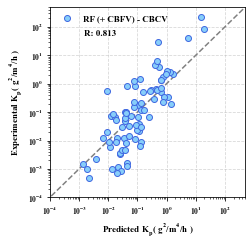

In [14]:
f = ['Temperature'] + ['Ni_a', 'Al_a', 'Cr_a'] + ['CE_var', "Val_eff_γ'", 'i_r_avg', 'PE_avg', 'e_a_con_avg']
a_data_f = a_data[f]
test_list = []
pre_list = []
feature_importance = np.zeros((len(a_data_f.columns), composition_num))
for fold, (train_id, test_id) in enumerate(gkf.split(a_data_f, kp_label, groups=groups)):
    train = a_data_f.values[train_id]
    test = a_data_f.values[test_id]
    scalar = StandardScaler()
    train = scalar.fit_transform(train)
    test = scalar.transform(test)
    train_label = kp_label[train_id]
    test_label = kp_label[test_id]
    test_list.append(test_label)
    rf = RandomForestRegressor(**param_dict['RF'])
    rf.fit(train, train_label)
    train_pre = rf.predict(train)
    test_pre = rf.predict(test)
    feature_importance[:, fold] = rf.feature_importances_
    pre_list.append(test_pre)
plt.figure(figsize=(3.5, 3.5))
plt.grid(linestyle='--', alpha=0.5, zorder=0)
plt.plot(range(-1, 21000, 1), range(-1, 21000, 1), '--', c='gray')
plt.loglog(np.exp(np.concatenate(pre_list, axis=0)), np.exp(np.concatenate(test_list, axis=0)), 
           '.', marker='o', color='lightskyblue', markeredgecolor='royalblue', label='RF (+ CBFV) - CBCV', zorder=2)
plt.xlim(10**(-4), 500)
plt.ylim(10**(-4), 500)
plt.xlabel('Predicted $\mathregular{K_p}$( $\mathregular{g^2}$/$\mathregular{m^4}$/h )', {'family': 'Times New Roman', 'weight': 'bold', 'size': 9})
plt.ylabel('Experimental $\mathregular{K_p}$( $\mathregular{g^2}$/$\mathregular{m^4}$/h )', {'family': 'Times New Roman', 'weight': 'bold', 'size': 9})
plt.text(0.0015, 50, s='R: {:.3f}'.format(computeCorrelation(np.concatenate(test_list, axis=0), np.concatenate(pre_list, axis=0))), fontdict={'family': 'Times New Roman', 'weight': 'bold', 'size': 9})
plt.legend(frameon=False, prop={'family': 'Times New Roman', 'weight': 'bold', 'size': 9})
plt.show()